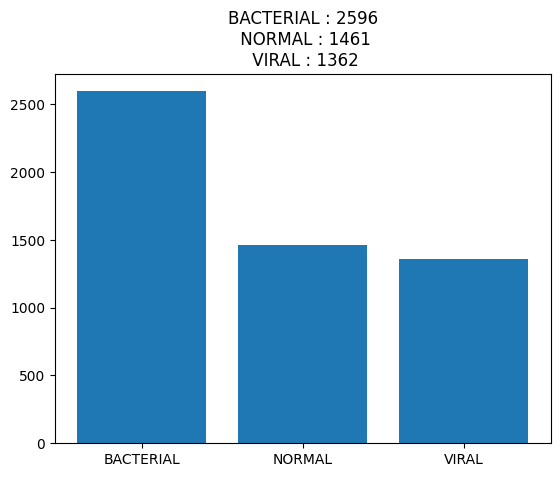

['BACTERIAL', 'NORMAL', 'VIRAL'] [2596, 1461, 1362]


In [5]:
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import time, os, getpass
import numpy as np
import tensorflow as tf


import keras
from keras.datasets import mnist
from keras.models import Sequential

import keras_metrics
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization
from keras.layers import RandomFlip,RandomTranslation,RandomZoom,RandomRotation, Input
from keras.optimizers import RMSprop, Adam, SGD
import keras_tuner as kt

from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_predict 
from sklearn.tree import DecisionTreeClassifier

import src.cfg as cfg
import src.myModels as models_store
import src.helpers as h

#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# total_files = sum([len(files) for r, d, files in os.walk(cfg.train_dir)])
h.plotClassBalance()

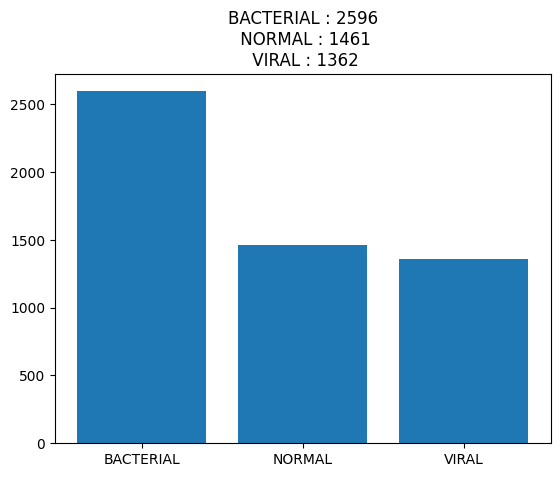

['BACTERIAL', 'NORMAL', 'VIRAL'] [2596, 1461, 1362]

Time: 2024-04-12 17:15:02 
Started: 0:10:09 ago
Last checkpoint: 0:00:00 ago
Found 5419 files belonging to 3 classes.
Using 4336 files for training.
Using 1083 files for validation.
Found 437 files belonging to 3 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 128, 128, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation_2            │ (None, 128, 128, 3)    │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_2 (RandomZoom)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 256)            │     3,211,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 256)            │        65,79

 Total params: 3,992,323 (15.23 MB)

 Trainable params: 3,992,323 (15.23 MB)

 Non-trainable params: 0 (0.00 B)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8395 - loss: 0.4094
Test accuracy: 0.8329519629478455
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       184
           1       0.94      0.95      0.95       122
           2       0.74      0.69      0.71       131

    accuracy                           0.83       437
   macro avg       0.84      0.83      0.83       437
weighted avg       0.83      0.83      0.83       437

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


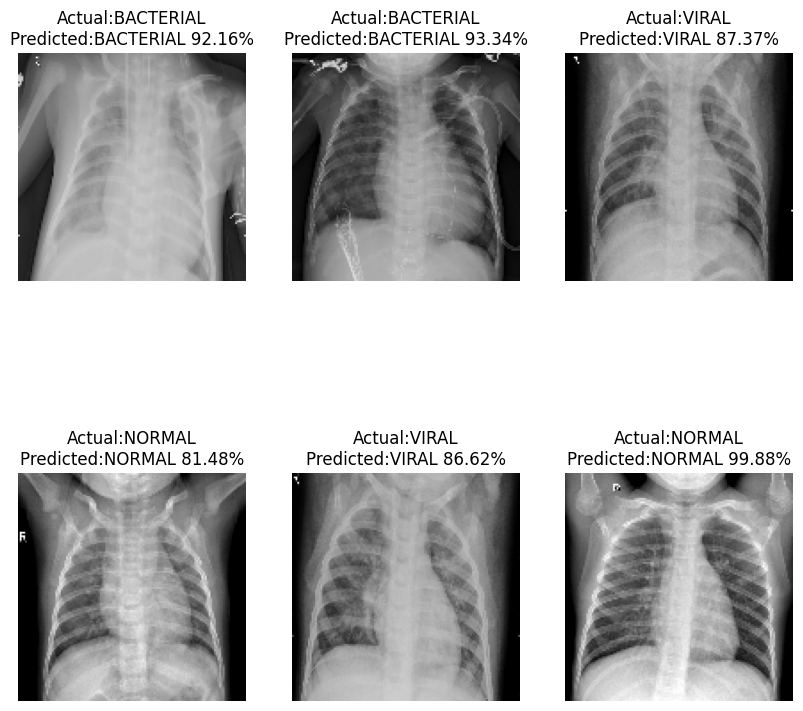

In [6]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import time
import os
import getpass
import numpy as np
import tensorflow as tf
import cv2


import keras
from keras.datasets import mnist
from keras.models import Sequential
import keras_metrics
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization
from keras.layers import RandomFlip, RandomTranslation, RandomZoom, RandomRotation, Input
from keras.optimizers import RMSprop, Adam, SGD
import keras_tuner as kt

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier

import src.cfg as cfg
import src.myModels as models_store
import src.helpers as h




# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# total_files = sum([len(files) for r, d, files in os.walk(cfg.train_dir)])
h.plotClassBalance()


# h.time_start = 0
h.time_lastCheck = time.time()
h.time_lapse()

            ############################

#!!!!!!!   Images must go to src folder  !!!!!!!!!!!!
#        or path edited in src/cfg.py file

            ############################

momentum = 0.5
learning_rate = 0.01

dropout = 0.2
units = 512

shape = (cfg.img_height, cfg.img_width, cfg.img_channels)

with tf.device('/gpu:0'):
    train_ds, val_ds, test_ds = h.get_ds()
    class_names = train_ds.class_names

    train_f, train_labels = h.split_ds(train_ds)
    test_f, test_labels = h.split_ds(test_ds)

        
    pred_model3 = tf.keras.applications.ResNet50V2(
        include_top=False, input_shape=shape, pooling='avg', classes=3, weights='imagenet')
    for layer in pred_model3.layers:
        layer.trainable = False

    # h.tuner(train_ds, overwrite=False)

    ############################
    ####   Define Model   ######
    ############################

    model = Sequential()
    model.add(Input(shape=shape))

    # preprocessing
    model.add(Rescaling(1.0/255))

    # augmentation
    model = models_store.add_augmentation(model)

    # layers
    model = models_store.add_convolution_std(model)

    model.add(Flatten())

    nodes = 256
    for i in range(12):
        model.add(Dense(nodes, activation='relu'))
        if i % 2 == 0:
            model.add(Dropout(0.4))

    # Output layer
    model.add(Dense(cfg.num_classes, activation='softmax'))

    ############################
    ####   Optimisers   ########
    ############################
    optimiser = [
        Adam(),
        SGD(learning_rate=learning_rate,  momentum=momentum),
        RMSprop()
    ]

    ############################
    ####   Compile   ###########
    ############################
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimiser[1],
                  metrics=['accuracy'])

    ############################
    #####   Model Summary   ####
    ############################
    model.summary()

    ############################
    #######   FIT    ###########
    ############################
    printEachEpoch = False

    if cfg.fit:
        history = model.fit(
            train_ds,
            class_weight=h.getClassWeights(train_ds),
            batch_size=cfg.batch_size,
            validation_data=val_ds,
            callbacks=[h.save_callback, h.epoch_callback()],
            epochs=cfg.epochs)
        h.plotHistory(history)
    else:
        model = tf.keras.models.load_model("pneumonia.keras")

    ############################
    #######   evaluate    ######
    ############################
    # if shuffle=True when creating the dataset, samples will be chosen randomly
    score = model.evaluate(test_ds, batch_size=cfg.batch_size)
    print('Test accuracy:', score[1])

    ############################
    ###   classification    ####
    ############################
    y_pred = model.predict(test_f)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(test_labels, y_pred_classes))

    ############################
    #######   Plot    ##########
    ############################
    test_batch = test_ds.take(1)
    h.plotBatch(test_batch, class_names, model)
